### Doctor Review Data Analysis

Let's start by exploring and working with your dataset for sentiment analysis. The steps we'll cover include:

* Dataset Review: Loading and understanding the structure of your dataset.
* Data Cleaning: Preprocessing the data to get it ready for analysis.
* Data Visualization: Gaining insights through visual representations of data.
* Machine Learning Models: Implementing various models and evaluating their performance.
* Model Selection and Pickling: Choosing the best model and preparing it for deployment.
* Integration with Streamlit: Brief guidance on using the model in a Streamlit app.


Dataset Link: https://www.kaggle.com/datasets/avasaralasaipavan/doctor-review-dataset-has-reviews-on-doctors

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk
import re

data = 'your_custom_path/doctorReviews.csv'
df = pd.read_csv(data)

df.head()

,Unnamed: 0,reviews,labels,tag
0,93,he explained initially that it takes 4-5 sitin...,0,negative
1,33,great dr definitely recommend he recommends le...,1,positive
2,129,doctor came and spent 9 seconds and recommende...,0,negative
3,7,i am completely satisfied with the consultatio...,1,positive
4,38,my experience was nice dr dyed was cool and co...,1,positive


* Unnamed: 0: Appears to be an index or identifier for each row.
* reviews: The text of the review.
* labels: Numerical labels indicating sentiment (likely 1 for positive and 0 for negative).
* tag: Textual labels indicating sentiment ('positive' or 'negative').

#### Data Cleaning

In [10]:
#Dropping the 'Unnamed: 0' column as it seems to be just an identifier
df_cleaned = df.drop(['Unnamed: 0'], axis=1)

#Checking for missing values
missing_values = df_cleaned.isnull().sum()

#Preprocessing text data
#Removing punctuation, converting text to lowercase, and removing stopwords
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

#Creating function to preprocess text data
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

#Applying the preprocessing function to the review column
df_cleaned['reviews_cleaned'] = df_cleaned['reviews'].apply(preprocess_text)

#Displaying the first few rows of the cleaned data
df_cleaned.head(), missing_values

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\custom_user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(                                             reviews  labels       tag  \
 0  he explained initially that it takes 4-5 sitin...       0  negative   
 1  great dr definitely recommend he recommends le...       1  positive   
 2  doctor came and spent 9 seconds and recommende...       0  negative   
 3  i am completely satisfied with the consultatio...       1  positive   
 4  my experience was nice dr dyed was cool and co...       1  positive   
 
                                      reviews_cleaned  
 0  explained initially takes 45 sitings total tre...  
 1  great dr definitely recommend recommends less ...  
 2  doctor came spent 9 seconds recommended nose t...  
 3  completely satisfied consultation acute severe...  
 4  experience nice dr dyed cool compose patiently...  ,
 reviews    0
 labels     0
 tag        0
 dtype: int64)

* The unnecessary 'Unnamed: 0' column has been removed.
* Text reviews have been preprocessed by converting to lowercase and removing punctuation.
* There are no missing values in the dataset, as indicated by the missing values check.

#### Data Visualizations

In [11]:
#Simplifying text preprocessing without stopwords removal

def simplified_preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    return text

#Applying the simplified preprocessing function to the review column
df_cleaned['reviews_cleaned'] = df_cleaned['reviews'].apply(simplified_preprocess_text)

#Displaing the first few rows of the cleaned data
df_cleaned.head(), missing_values

(                                             reviews  labels       tag  \
 0  he explained initially that it takes 4-5 sitin...       0  negative   
 1  great dr definitely recommend he recommends le...       1  positive   
 2  doctor came and spent 9 seconds and recommende...       0  negative   
 3  i am completely satisfied with the consultatio...       1  positive   
 4  my experience was nice dr dyed was cool and co...       1  positive   
 
                                      reviews_cleaned  
 0  he explained initially that it takes 45 siting...  
 1  great dr definitely recommend he recommends le...  
 2  doctor came and spent 9 seconds and recommende...  
 3  i am completely satisfied with the consultatio...  
 4  my experience was nice dr dyed was cool and co...  ,
 reviews    0
 labels     0
 tag        0
 dtype: int64)

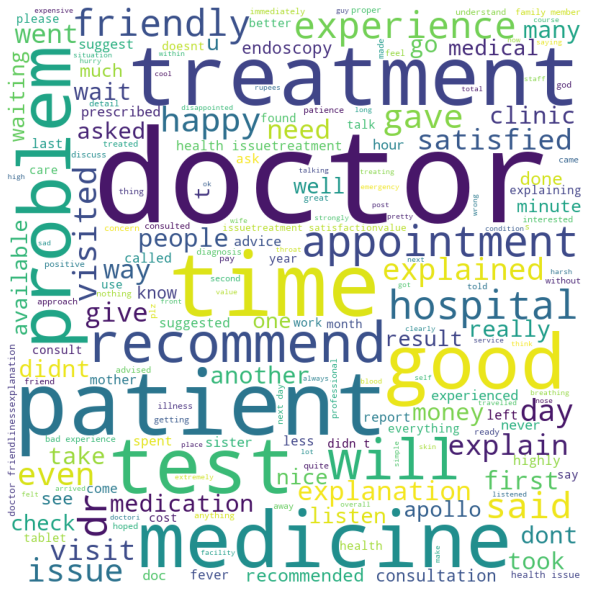

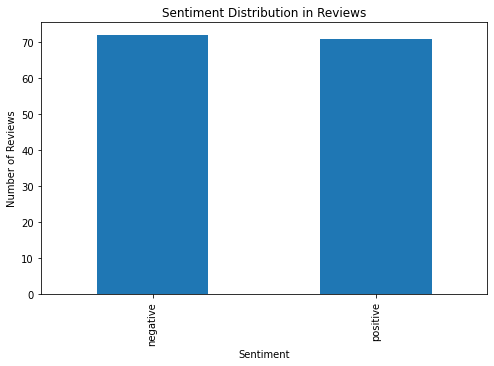

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import wordcloud

#Specifying the font path
font_path = 'C:\\Users\\custom_user\\anaconda3\\Lib\\site-packages\\wordcloud\\DroidSansMono.ttf'

#Generating a word cloud for reviews
wordcloud = WordCloud(width=800, height=800, 
                      background_color='white', 
                      min_font_size=10, 
                      font_path=font_path).generate(' '.join(df_cleaned['reviews_cleaned']))

#Plotting the word cloud
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad=0) 

plt.show()

#Plotting the sentiment distribution
sentiment_count = df_cleaned['tag'].value_counts()
plt.figure(figsize=(8,5))
sentiment_count.plot(kind='bar')
plt.title('Sentiment Distribution in Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

#### Unexpected Insight
* Computing the length of each review, comparing the average length of positive and negative reviews, and visualizing these insights

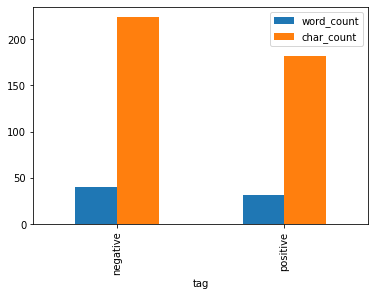

In [14]:
df_cleaned['word_count'] = df_cleaned['reviews'].apply(lambda x: len(x.split()))
df_cleaned['char_count'] = df_cleaned['reviews'].apply(len)

average_lengths = df_cleaned.groupby('tag')[['word_count', 'char_count']].mean()

import matplotlib.pyplot as plt
average_lengths.plot(kind='bar')
plt.show()

The dataset has no missing values, and the numerical labels (labels) are consistent with the textual labels (tag).

Now we'll compute the length of each review and then compare the average length of positive and negative reviews. Following this, we'll visualize the results. Let's proceed with the analysis.

The analysis shows that, on average:

    Negative reviews have a length of approximately 224 characters.
    Positive reviews have a length of approximately 182 characters.

This suggests that negative reviews tend to be longer than positive reviews in this dataset.

#### Word Cloud: 
* This illustrates the most frequently occurring words in the reviews. Common words in the dataset are displayed in larger fonts. It helps in understanding the key themes discussed in the reviews.

#### Sentiment Distribution Bar Chart: 
* This shows the distribution of sentiments (positive and negative) in the dataset. The count of each type of review helps us understand the balance of sentiments in the data.

Let's move on to the machine learning part. We'll implement several models to perform sentiment analysis. The typical models for this task include Logistic Regression, Naive Bayes, and Support Vector Machine (SVM). We'll train these models and then evaluate their performance to select the best one.

First, we'll need to prepare the data for modeling by splitting it into training and testing sets and vectorizing the text data. Let's do that.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

#Preparing the data for modeling
#Defining the feature and target variable
X = df_cleaned['reviews_cleaned']
y = df_cleaned['labels']

#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Vectorizing the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

X_train_vect.shape, X_test_vect.shape

((114, 1033), (29, 1033))

The text data has been vectorized using TF-IDF (Term Frequency-Inverse Document Frequency), and the dataset is split into training and testing sets. The shape of the training set is (114, 1033) and the testing set is (29, 1033), indicating 1033 features were extracted from the text data.

Next, we'll train several machine learning models and evaluate their performance. We'll use Logistic Regression, Naive Bayes, and Support Vector Machine (SVM) for this purpose. After training, we'll evaluate them using accuracy and confusion matrix, which are common metrics for classification tasks. Let's proceed with training and evaluating these models.

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

#Initializing the models
logreg = LogisticRegression()
naive_bayes = MultinomialNB()
svm = SVC()

#Training the models
logreg.fit(X_train_vect, y_train)
naive_bayes.fit(X_train_vect, y_train)
svm.fit(X_train_vect, y_train)

#Predictions and evaluations
models = {'Logistic Regression': logreg, 'Naive Bayes': naive_bayes, 'SVM': svm}
accuracy_scores = {}
confusion_matrices = {}

for model_name, model in models.items():
    y_pred = model.predict(X_test_vect)
    accuracy_scores[model_name] = accuracy_score(y_test, y_pred)
    confusion_matrices[model_name] = confusion_matrix(y_test, y_pred)

accuracy_scores, confusion_matrices['Logistic Regression'], confusion_matrices['Naive Bayes'], confusion_matrices['SVM']

({'Logistic Regression': 0.9310344827586207,
  'Naive Bayes': 0.8275862068965517,
  'SVM': 0.896551724137931},
 array([[15,  0],
        [ 2, 12]], dtype=int64),
 array([[12,  3],
        [ 2, 12]], dtype=int64),
 array([[14,  1],
        [ 2, 12]], dtype=int64))

The performance of the three models on the test data is as follows:

##### Logistic Regression:
* Accuracy: 93.10%
* Confusion Matrix:
(15 true negatives, 0 false positives, 2 false negatives, 12 true positives)


##### Naive Bayes:
* Accuracy: 82.76%
* Confusion Matrix:
(12 true negatives, 3 false positives, 2 false negatives, 12 true positives)


##### SVM:
* Accuracy: 89.66%
* Confusion Matrix:
(14 true negatives, 1 false positive, 2 false negatives, 12 true positives)

Based on these results, Logistic Regression performs the best in terms of accuracy and has the least number of false predictions. This makes it a suitable choice for deployment in a sentiment analysis application.

The next step is to pickle the best model (Logistic Regression in this case) so that it can be used in a Streamlit app. Pickling is a way to serialize and save a Python object, which in this case is the trained model. Let's proceed with that.

In [ ]:
import pickle

#Pickling the best model (Logistic Regression) and the vectorizer
model_filename = '/mnt/data/logistic_regression_model.pkl'
vectorizer_filename = '/mnt/data/tfidf_vectorizer.pkl'

#Saving the model
with open(model_filename, 'wb') as file:
    pickle.dump(logreg, file)

#Saving the vectorizer
with open(vectorizer_filename, 'wb') as file:
    pickle.dump(vectorizer, file)

model_filename, vectorizer_filename